# Classification

## Note :

df_milk : represents the analysis with all variables (pH, Temprature, Taste, Odor, Fat, Turbidity, Colour, Grade)

df_milk2 : represents the analysis with selected variables (pH, Temprature, Odor, Fat)

In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Import File (.csv)

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

# All Features
df_milk = spark.read.option("inferSchema", "true").csv("milknew.csv", header = True)
df_milk.show(20)

# Selected Features
df_milk2 = spark.read.option("inferSchema", "true").csv("milknew.csv", header = True)
df_milk2.show(20)

+---+----------+-----+----+----+---------+------+------+
| pH|Temprature|Taste|Odor|Fat |Turbidity|Colour| Grade|
+---+----------+-----+----+----+---------+------+------+
|6.6|        35|    1|   0|   1|        0|   254|  high|
|6.6|        36|    0|   1|   0|        1|   253|  high|
|8.5|        70|    1|   1|   1|        1|   246|   low|
|9.5|        34|    1|   1|   0|        1|   255|   low|
|6.6|        37|    0|   0|   0|        0|   255|medium|
|6.6|        37|    1|   1|   1|        1|   255|  high|
|5.5|        45|    1|   0|   1|        1|   250|   low|
|4.5|        60|    0|   1|   1|        1|   250|   low|
|8.1|        66|    1|   0|   1|        1|   255|   low|
|6.7|        45|    1|   1|   0|        0|   247|medium|
|6.7|        45|    1|   1|   1|        0|   245|medium|
|5.6|        50|    0|   1|   1|        1|   255|   low|
|8.6|        55|    0|   1|   1|        1|   255|   low|
|7.4|        90|    1|   0|   1|        1|   255|   low|
|6.8|        45|    0|   1|   1

### Select Features

In [ ]:
# All Features
df_milk.show(20)

# Selected Features
df_milk2 = df_milk2.select("pH", "Temprature", "Odor", "Fat ", "Grade")
df_milk2.show(20)

print(df_milk.count())

+---+----------+-----+----+----+---------+------+------+
| pH|Temprature|Taste|Odor|Fat |Turbidity|Colour| Grade|
+---+----------+-----+----+----+---------+------+------+
|6.6|        35|    1|   0|   1|        0|   254|  high|
|6.6|        36|    0|   1|   0|        1|   253|  high|
|8.5|        70|    1|   1|   1|        1|   246|   low|
|9.5|        34|    1|   1|   0|        1|   255|   low|
|6.6|        37|    0|   0|   0|        0|   255|medium|
|6.6|        37|    1|   1|   1|        1|   255|  high|
|5.5|        45|    1|   0|   1|        1|   250|   low|
|4.5|        60|    0|   1|   1|        1|   250|   low|
|8.1|        66|    1|   0|   1|        1|   255|   low|
|6.7|        45|    1|   1|   0|        0|   247|medium|
|6.7|        45|    1|   1|   1|        0|   245|medium|
|5.6|        50|    0|   1|   1|        1|   255|   low|
|8.6|        55|    0|   1|   1|        1|   255|   low|
|7.4|        90|    1|   0|   1|        1|   255|   low|
|6.8|        45|    0|   1|   1

### Transform Data (String into Numeric)

In [ ]:
from pyspark.sql.functions import when

def transform(df):
    df = df.withColumn("Grade", when(df["Grade"] == "low", 0).
                                when(df["Grade"] == "medium", 1).
                                otherwise(2))
    return df

# All Features
df_milk = transform(df_milk)
df_milk.show(20)

# Selected Features
df_milk2 = transform(df_milk2)
df_milk2.show(20)

+---+----------+-----+----+----+---------+------+-----+
| pH|Temprature|Taste|Odor|Fat |Turbidity|Colour|Grade|
+---+----------+-----+----+----+---------+------+-----+
|6.6|        35|    1|   0|   1|        0|   254|    2|
|6.6|        36|    0|   1|   0|        1|   253|    2|
|8.5|        70|    1|   1|   1|        1|   246|    0|
|9.5|        34|    1|   1|   0|        1|   255|    0|
|6.6|        37|    0|   0|   0|        0|   255|    1|
|6.6|        37|    1|   1|   1|        1|   255|    2|
|5.5|        45|    1|   0|   1|        1|   250|    0|
|4.5|        60|    0|   1|   1|        1|   250|    0|
|8.1|        66|    1|   0|   1|        1|   255|    0|
|6.7|        45|    1|   1|   0|        0|   247|    1|
|6.7|        45|    1|   1|   1|        0|   245|    1|
|5.6|        50|    0|   1|   1|        1|   255|    0|
|8.6|        55|    0|   1|   1|        1|   255|    0|
|7.4|        90|    1|   0|   1|        1|   255|    0|
|6.8|        45|    0|   1|   1|        1|   255

### Normalization

In [ ]:
from pyspark.ml.feature import VectorAssembler, StandardScaler

def normalize(df):
    cols = df.columns
    cols.remove("Grade")

    df = VectorAssembler(inputCols = cols, outputCol = "Features").transform(df)
    df = StandardScaler(inputCol = "Features", outputCol = "Scaled Features").fit(df).transform(df)

    return df

# All Features
df_milk = normalize(df_milk)
df_milk.show(20)

# Selected Features
df_milk2 = normalize(df_milk2)
df_milk2.show(20)

+---+----------+-----+----+----+---------+------+-----+--------------------+--------------------+
| pH|Temprature|Taste|Odor|Fat |Turbidity|Colour|Grade|            Features|     Scaled Features|
+---+----------+-----+----+----+---------+------+-----+--------------------+--------------------+
|6.6|        35|    1|   0|   1|        0|   254|    2|[6.6,35.0,1.0,0.0...|[4.71536698812694...|
|6.6|        36|    0|   1|   0|        1|   253|    2|[6.6,36.0,0.0,1.0...|[4.71536698812694...|
|8.5|        70|    1|   1|   1|        1|   246|    0|[8.5,70.0,1.0,1.0...|[6.07282112107258...|
|9.5|        34|    1|   1|   0|        1|   255|    0|[9.5,34.0,1.0,1.0...|[6.78727066472818...|
|6.6|        37|    0|   0|   0|        0|   255|    1|(7,[0,1,6],[6.6,3...|(7,[0,1,6],[4.715...|
|6.6|        37|    1|   1|   1|        1|   255|    2|[6.6,37.0,1.0,1.0...|[4.71536698812694...|
|5.5|        45|    1|   0|   1|        1|   250|    0|[5.5,45.0,1.0,0.0...|[3.92947249010578...|
|4.5|        60|    

### Logistic Regression

In [ ]:
from pyspark.ml.classification import LogisticRegression

# All Features
model_milk = LogisticRegression(featuresCol="Scaled Features", labelCol="Grade", maxIter=10).fit(df_milk)
prediction_milk = model_milk.transform(df_milk)

prediction_milk.select("pH", "Temprature", "Taste", "Odor", "Fat ", "Turbidity", "Grade", "prediction").show(10)

+---+----------+-----+----+----+---------+-----+----------+
| pH|Temprature|Taste|Odor|Fat |Turbidity|Grade|prediction|
+---+----------+-----+----+----+---------+-----+----------+
|6.6|        35|    1|   0|   1|        0|    2|       1.0|
|6.6|        36|    0|   1|   0|        1|    2|       1.0|
|8.5|        70|    1|   1|   1|        1|    0|       0.0|
|9.5|        34|    1|   1|   0|        1|    0|       0.0|
|6.6|        37|    0|   0|   0|        0|    1|       1.0|
|6.6|        37|    1|   1|   1|        1|    2|       2.0|
|5.5|        45|    1|   0|   1|        1|    0|       0.0|
|4.5|        60|    0|   1|   1|        1|    0|       0.0|
|8.1|        66|    1|   0|   1|        1|    0|       0.0|
|6.7|        45|    1|   1|   0|        0|    1|       1.0|
+---+----------+-----+----+----+---------+-----+----------+
only showing top 10 rows



In [ ]:
# Selected Features
model_milk2 = LogisticRegression(featuresCol="Scaled Features", labelCol="Grade", maxIter=10).fit(df_milk2)
prediction_milk2 = model_milk2.transform(df_milk2)

prediction_milk2.select("pH", "Temprature", "Odor", "Fat ", "Grade", "prediction").show(10)

+---+----------+----+----+-----+----------+
| pH|Temprature|Odor|Fat |Grade|prediction|
+---+----------+----+----+-----+----------+
|6.6|        35|   0|   1|    2|       1.0|
|6.6|        36|   1|   0|    2|       1.0|
|8.5|        70|   1|   1|    0|       0.0|
|9.5|        34|   1|   0|    0|       1.0|
|6.6|        37|   0|   0|    1|       1.0|
|6.6|        37|   1|   1|    2|       2.0|
|5.5|        45|   0|   1|    0|       0.0|
|4.5|        60|   1|   1|    0|       0.0|
|8.1|        66|   0|   1|    0|       0.0|
|6.7|        45|   1|   0|    1|       0.0|
+---+----------+----+----+-----+----------+
only showing top 10 rows



### Accuracy Prediction

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# All Features
multiEvaluator = MulticlassClassificationEvaluator(labelCol = "Grade")
accuracy_milk = multiEvaluator.evaluate(prediction_milk)
print("Accuracy Milk: ", accuracy_milk)

# Selected Features
accuracy_milk2 = multiEvaluator.evaluate(prediction_milk2)
print("Accuracy Milk 2: ", accuracy_milk2)

Accuracy Milk:  0.8529257635244848
Accuracy Milk 2:  0.7127907738954539


### Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

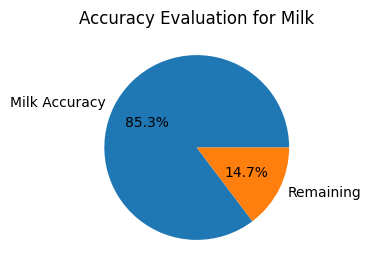

In [ ]:
labels = ['Milk Accuracy', 'Remaining']
sizes = [accuracy_milk, 1 - accuracy_milk]

plt.figure(figsize=(5, 3))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Accuracy Evaluation for Milk')
plt.show()

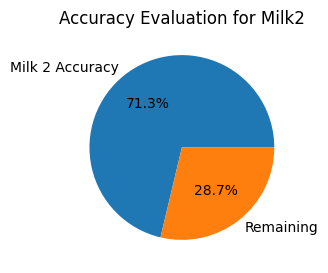

In [ ]:
labels = ['Milk 2 Accuracy', 'Remaining']
sizes = [accuracy_milk2, 1 - accuracy_milk2]

plt.figure(figsize=(5, 3))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Accuracy Evaluation for Milk2')
plt.show()

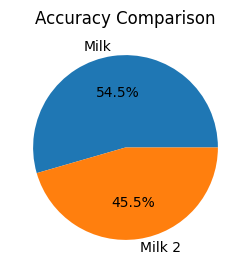

In [ ]:
labels = ['Milk', 'Milk 2']
accuracies = [accuracy_milk, accuracy_milk2]

plt.figure(figsize=(5, 3))
plt.pie(accuracies, labels=labels, autopct='%1.1f%%')
plt.title('Accuracy Comparison')
plt.show()

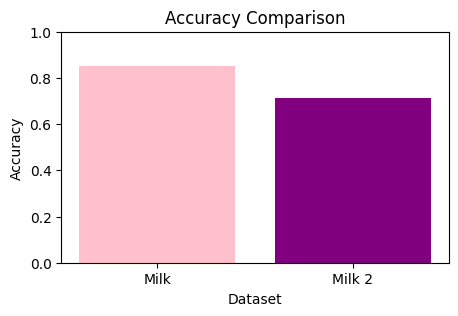

In [ ]:
labels = ['Milk', 'Milk 2']
accuracies = [accuracy_milk, accuracy_milk2]
colors = ['pink', 'purple']

plt.figure(figsize=(5, 3))
plt.bar(labels, accuracies, color=colors)
plt.title('Accuracy Comparison')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.ylim(0, 1.0)
plt.show()

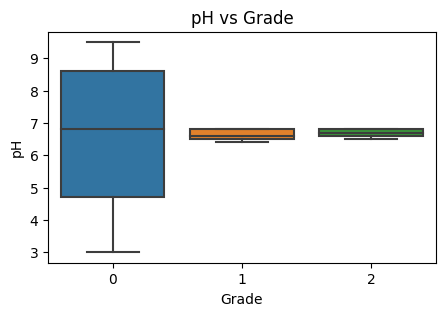

In [ ]:
plt.figure(figsize=(5, 3))
sns.boxplot(data=df_milk.toPandas(), x="Grade", y="pH")
plt.title(f"pH vs Grade")
plt.xlabel("Grade")
plt.ylabel("pH")
plt.show()

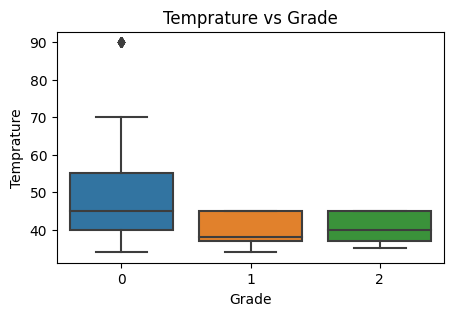

In [ ]:
plt.figure(figsize=(5, 3))
sns.boxplot(data=df_milk.toPandas(), x="Grade", y="Temprature")
plt.title(f"Temprature vs Grade")
plt.xlabel("Grade")
plt.ylabel("Temprature")
plt.show()

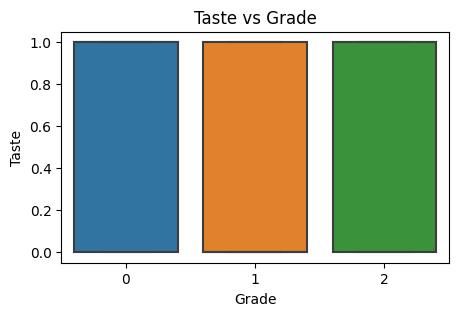

In [ ]:
plt.figure(figsize=(5, 3))
sns.boxplot(data=df_milk.toPandas(), x="Grade", y="Taste")
plt.title(f"Taste vs Grade")
plt.xlabel("Grade")
plt.ylabel("Taste")
plt.show()

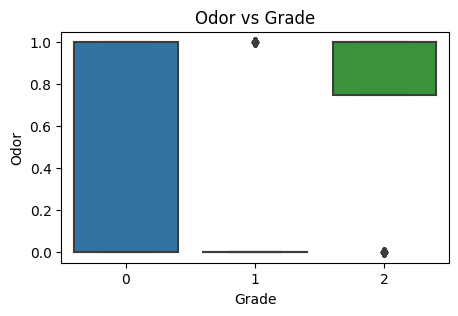

In [ ]:
plt.figure(figsize=(5, 3))
sns.boxplot(data=df_milk.toPandas(), x="Grade", y="Odor")
plt.title(f"Odor vs Grade")
plt.xlabel("Grade")
plt.ylabel("Odor")
plt.show()

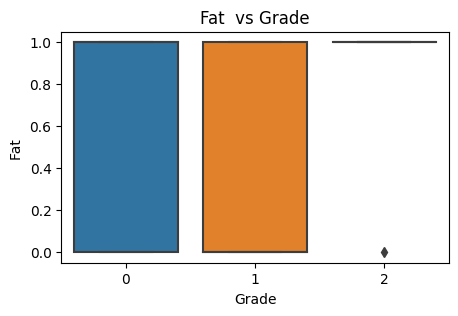

In [ ]:
plt.figure(figsize=(5, 3))
sns.boxplot(data=df_milk.toPandas(), x="Grade", y="Fat ")
plt.title(f"Fat  vs Grade")
plt.xlabel("Grade")
plt.ylabel("Fat ")
plt.show()

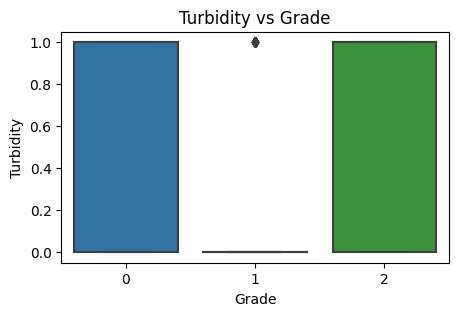

In [ ]:
plt.figure(figsize=(5, 3))
sns.boxplot(data=df_milk.toPandas(), x="Grade", y="Turbidity")
plt.title(f"Turbidity vs Grade")
plt.xlabel("Grade")
plt.ylabel("Turbidity")
plt.show()

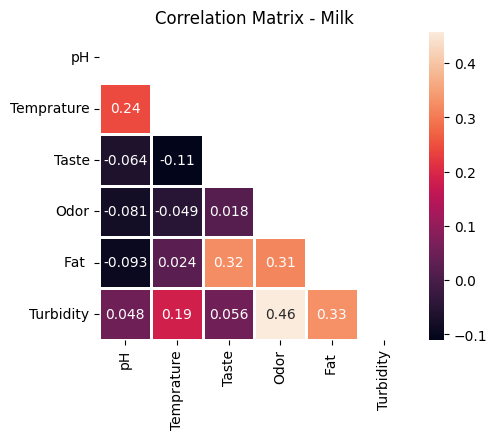

In [ ]:
df_corr_milk = df_milk.select("pH", "Temprature", "Taste", "Odor", "Fat ", "Turbidity").toPandas().corr()

plt.figure(figsize=(5, 4))
matrix_milk = np.triu(df_corr_milk)
sns.heatmap(df_corr_milk, annot=True, linewidth=.8, mask=matrix_milk, cmap="rocket")
plt.title('Correlation Matrix - Milk')
plt.show()

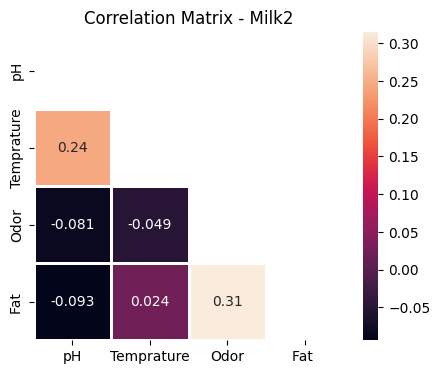

In [ ]:
df_corr_milk2 = df_milk2.select("pH", "Temprature", "Odor", "Fat ").toPandas().corr()

plt.figure(figsize=(5, 4))
matrix_milk2 = np.triu(df_corr_milk2)
sns.heatmap(df_corr_milk2, annot=True, linewidth=.8, mask=matrix_milk2, cmap="rocket")
plt.title('Correlation Matrix - Milk2')
plt.show()